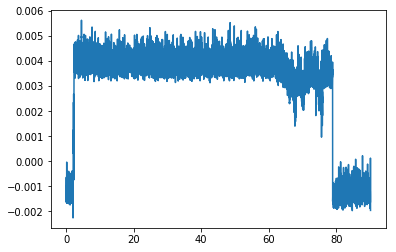

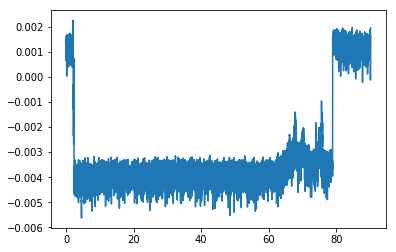

length of updated time list 0
length of updated curr list 0


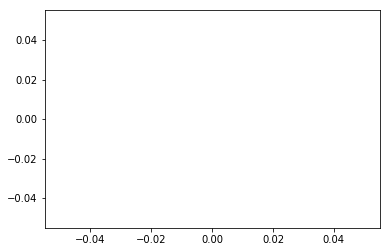

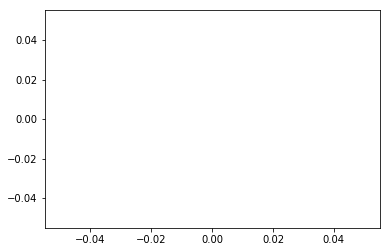

C:\Users\smukhe33\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:190: RuntimeWarning: Mean of empty slice.
  loc = data.mean()
C:\Users\smukhe33\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:195: RuntimeWarning: Mean of empty slice.
  scale = np.sqrt(((data - loc)**2).mean())


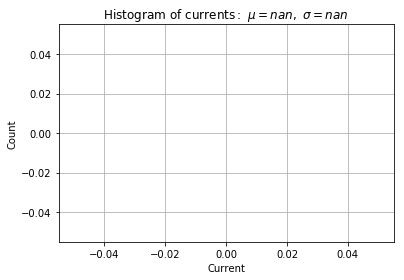

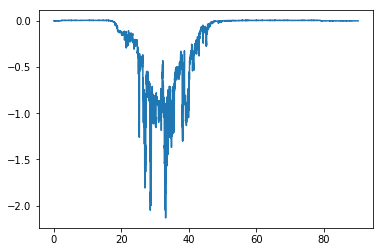

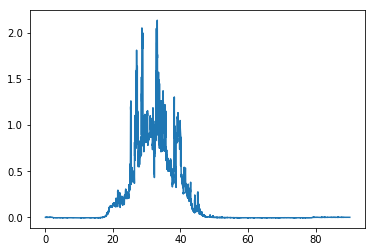

length of updated time list 1495633
length of updated curr list 1495633


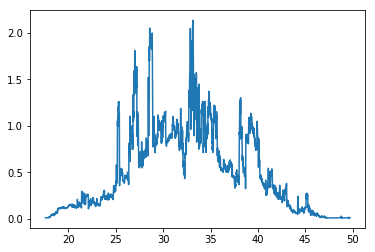

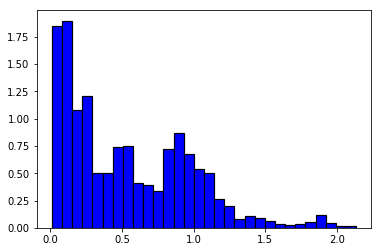

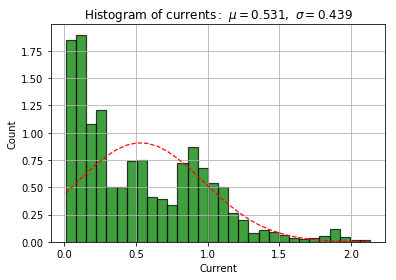

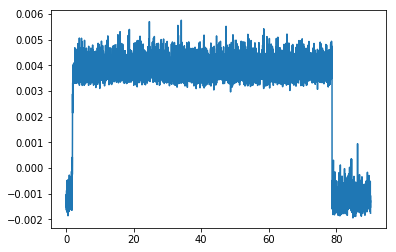

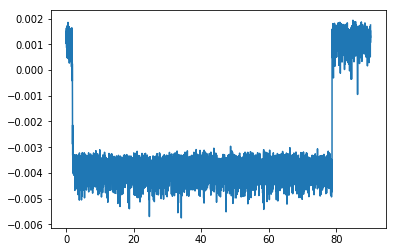

length of updated time list 0
length of updated curr list 0


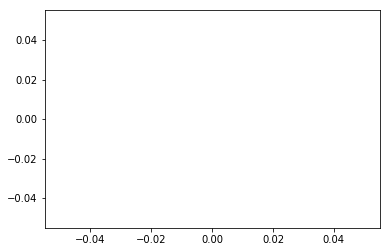

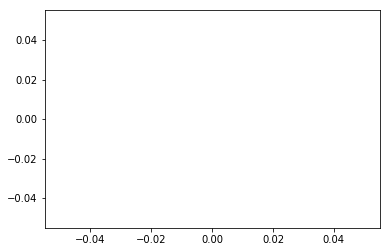

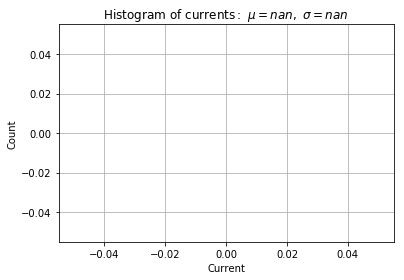

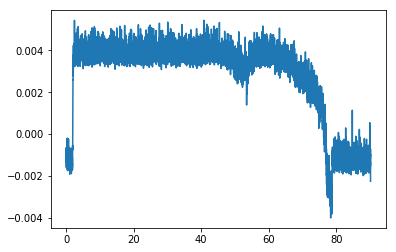

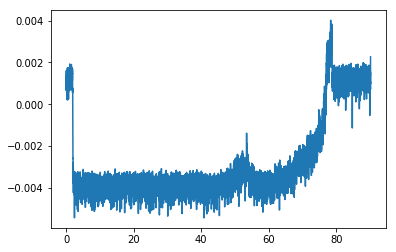

length of updated time list 0
length of updated curr list 0


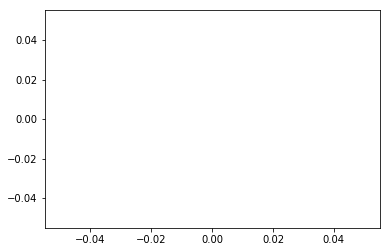

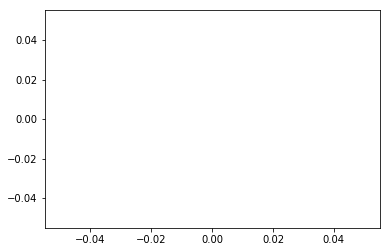

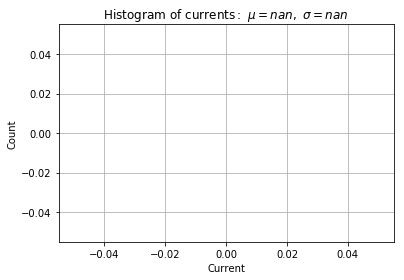

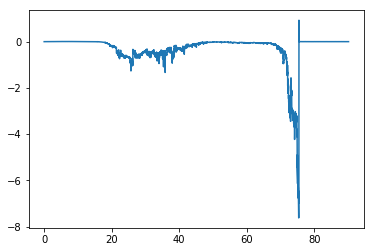

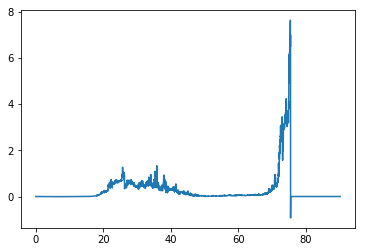

length of updated time list 2953060
length of updated curr list 2953060


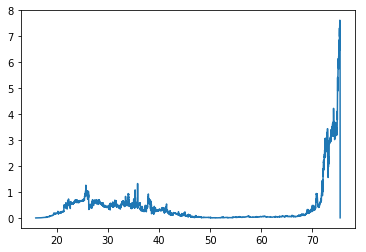

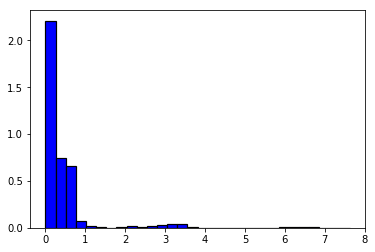

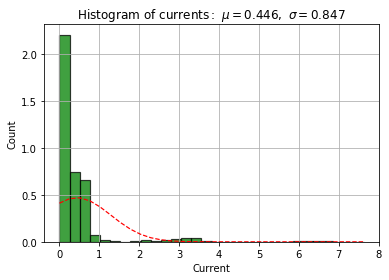

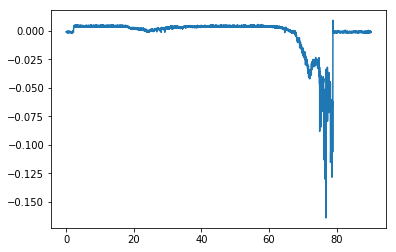

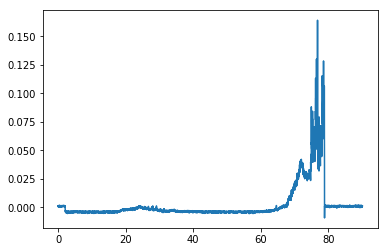

length of updated time list 495444
length of updated curr list 495444


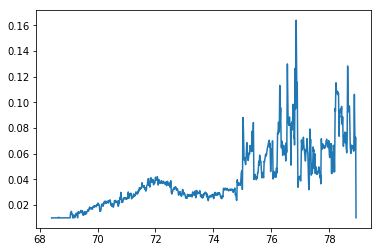

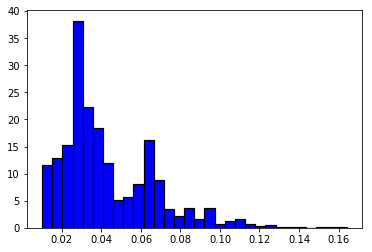

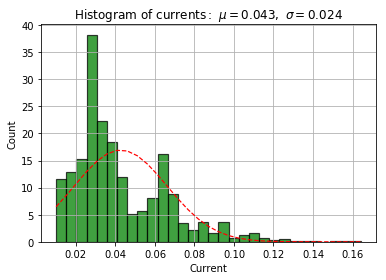

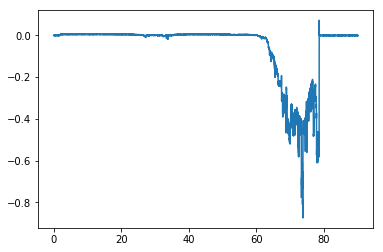

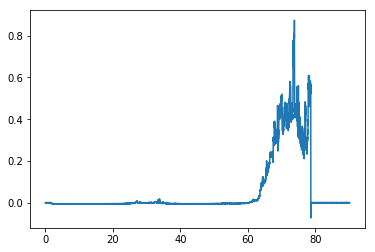

length of updated time list 850344
length of updated curr list 850344


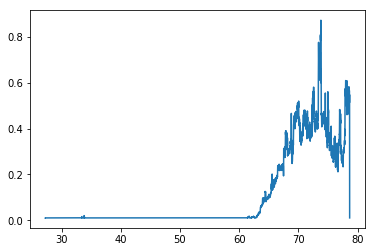

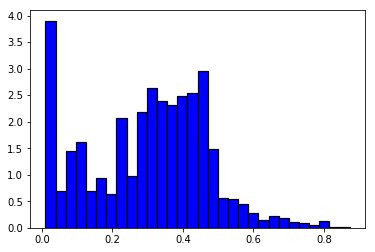

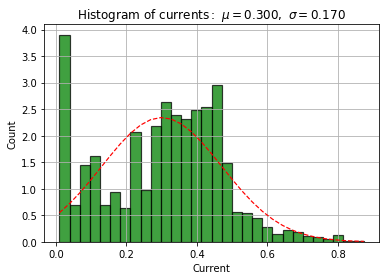

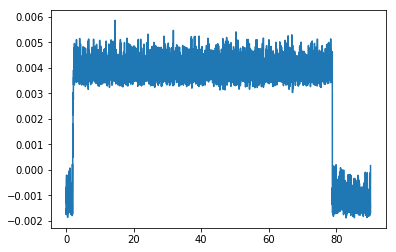

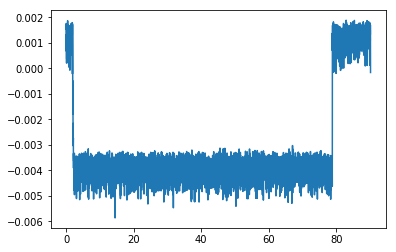

length of updated time list 0
length of updated curr list 0


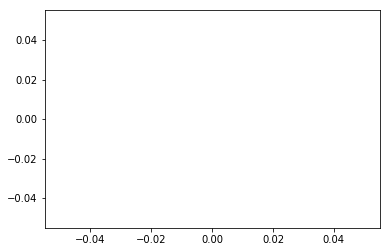

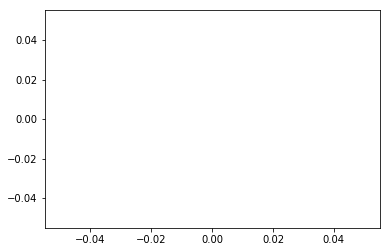

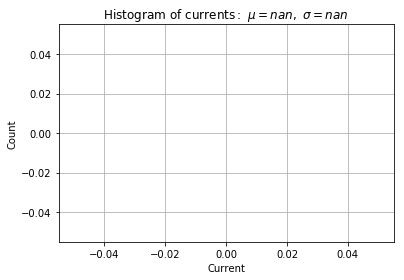

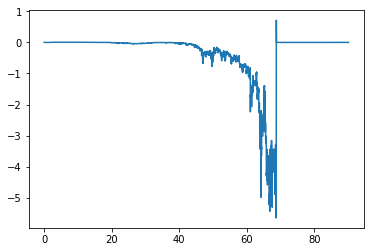

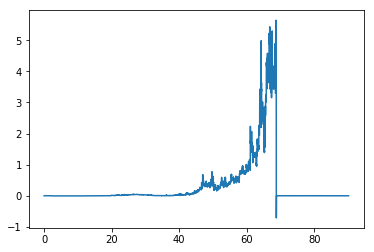

length of updated time list 2143241
length of updated curr list 2143241


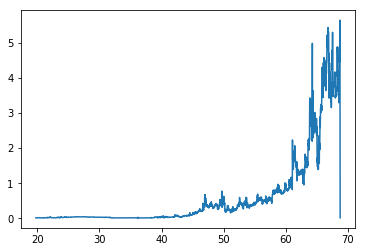

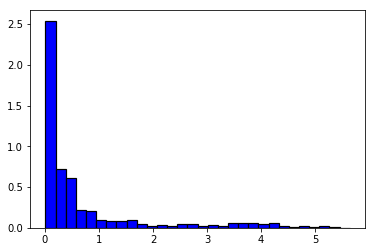

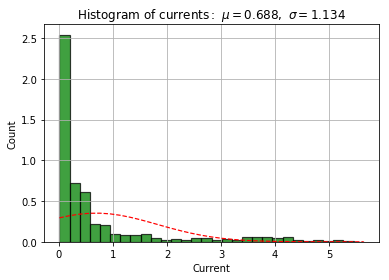

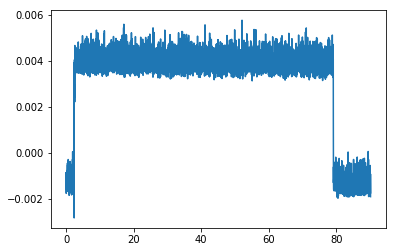

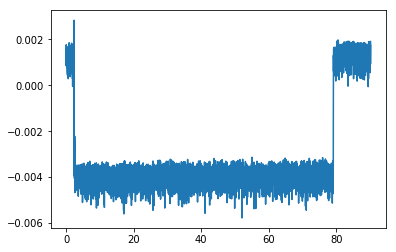

length of updated time list 0
length of updated curr list 0


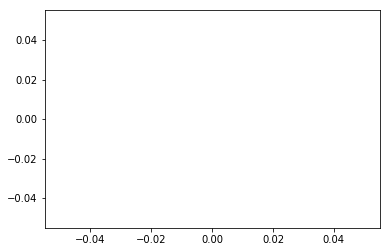

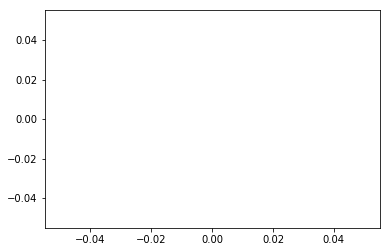

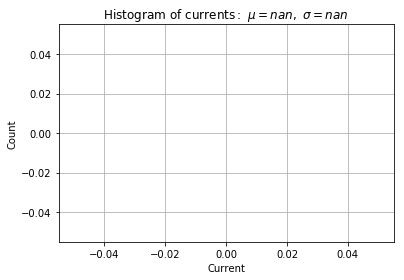

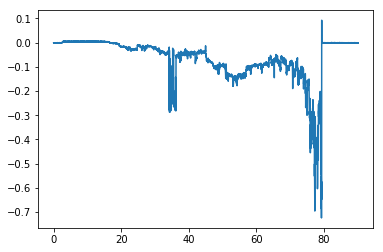

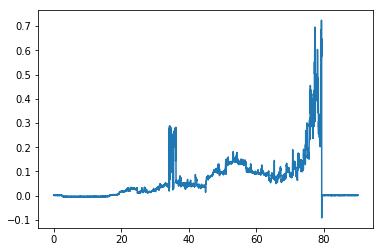

length of updated time list 2996934
length of updated curr list 2996934


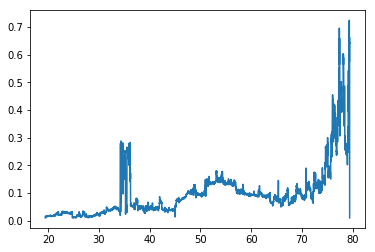

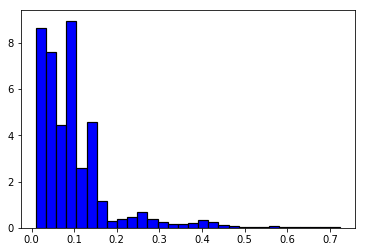

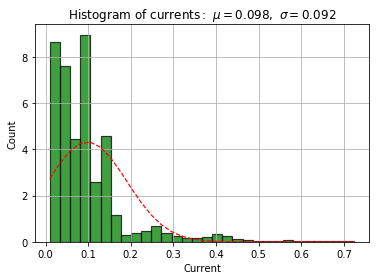

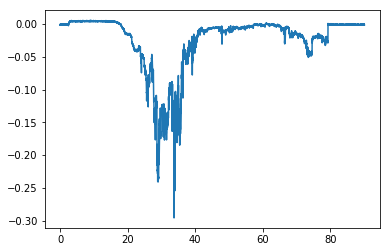

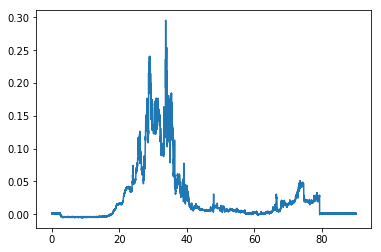

length of updated time list 1875027
length of updated curr list 1875027


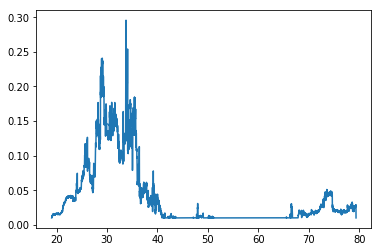

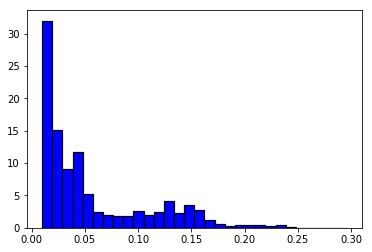

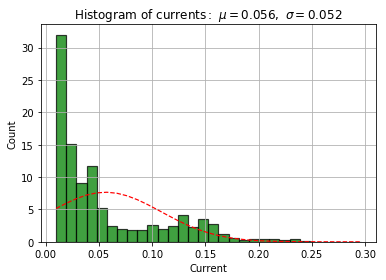

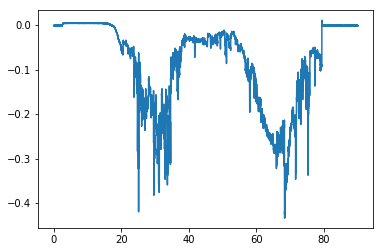

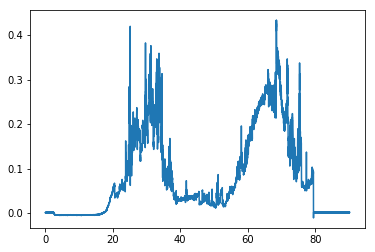

length of updated time list 3057924
length of updated curr list 3057924


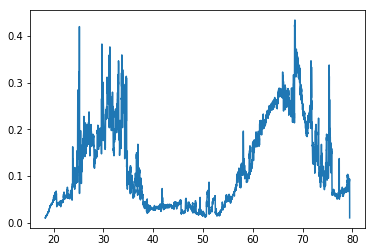

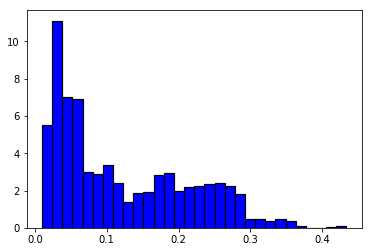

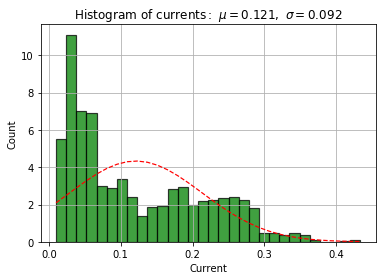

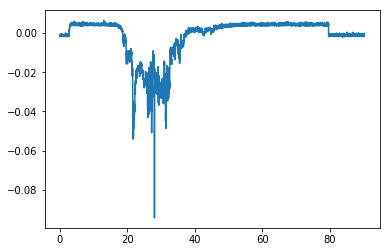

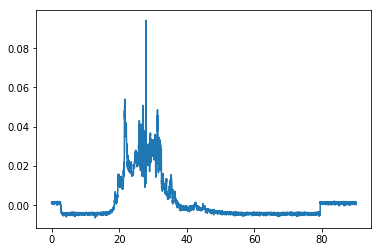

length of updated time list 679213
length of updated curr list 679213


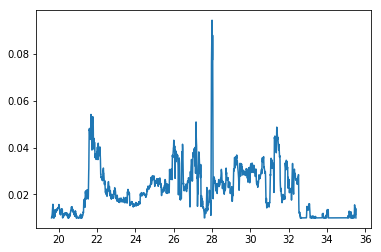

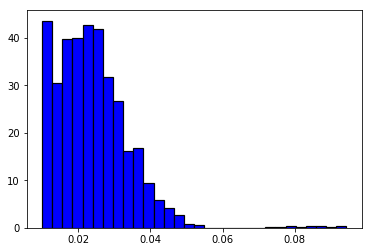

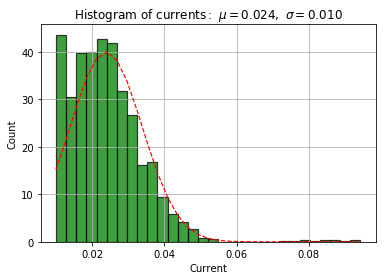

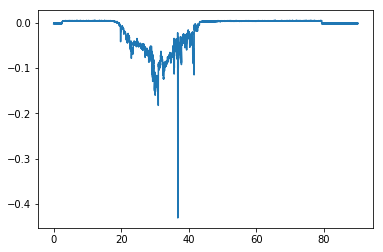

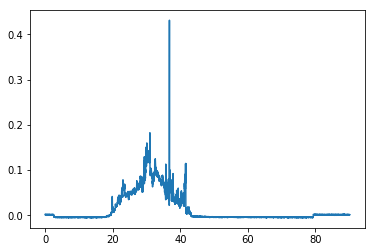

length of updated time list 1110921
length of updated curr list 1110921


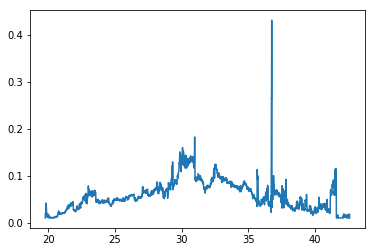

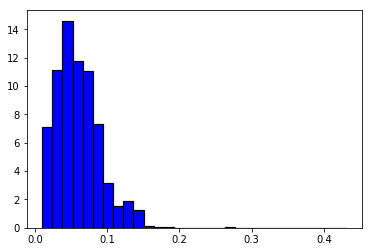

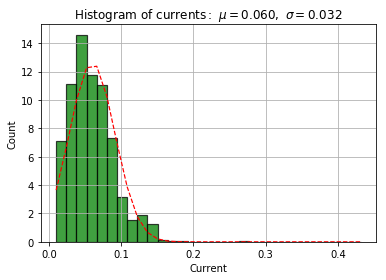

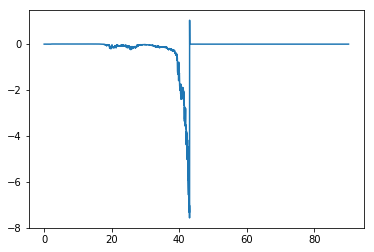

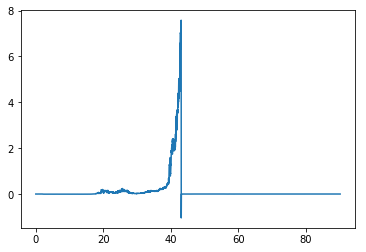

length of updated time list 1273423
length of updated curr list 1273423


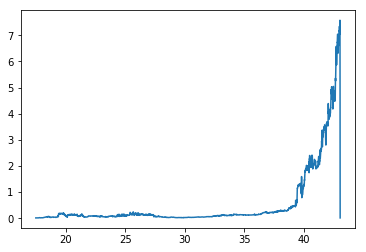

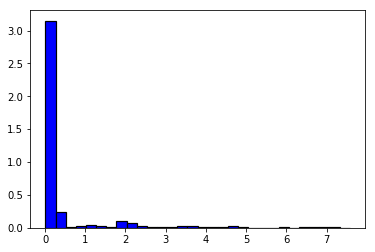

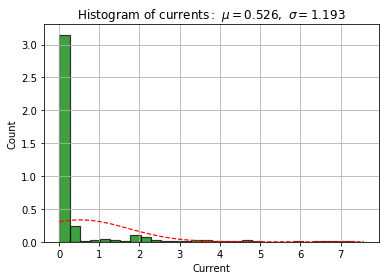

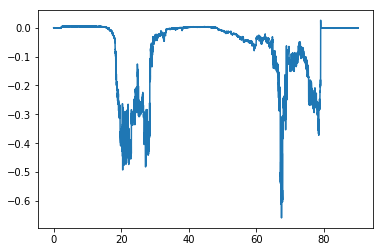

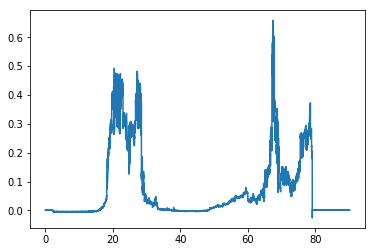

length of updated time list 2278685
length of updated curr list 2278685


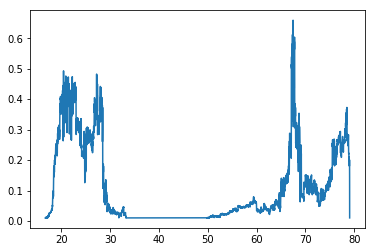

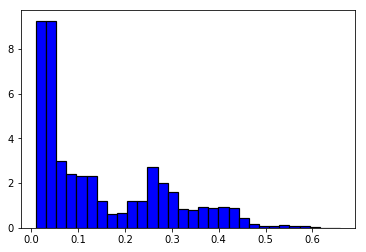

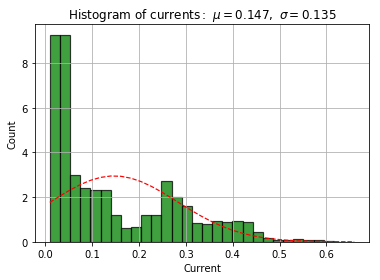

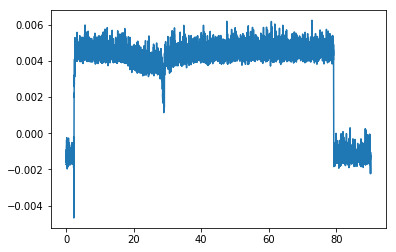

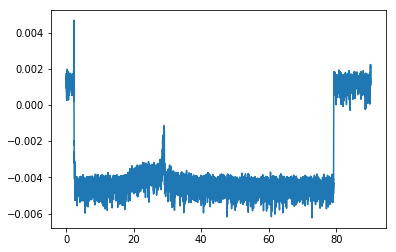

length of updated time list 0
length of updated curr list 0


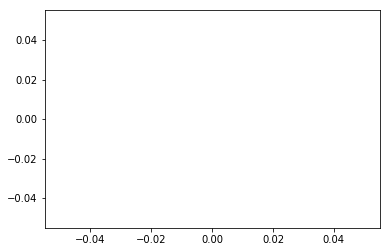

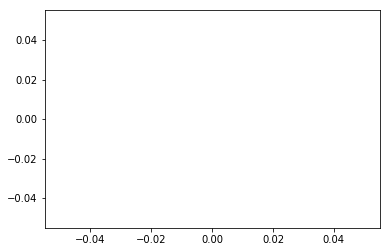

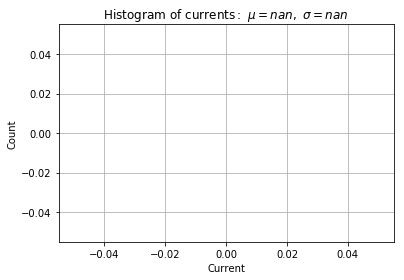

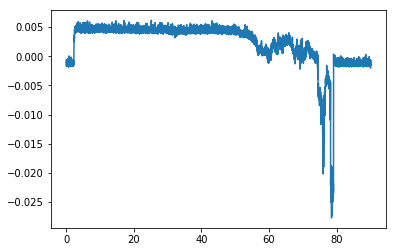

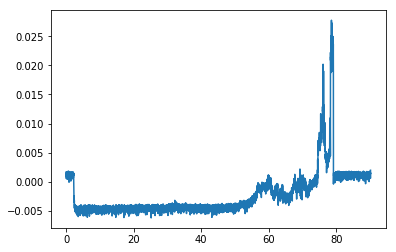

length of updated time list 75976
length of updated curr list 75976


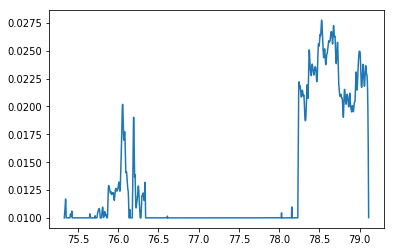

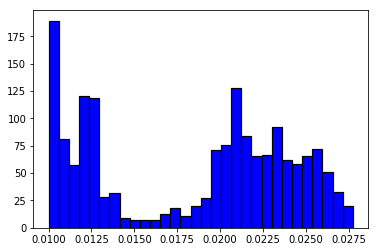

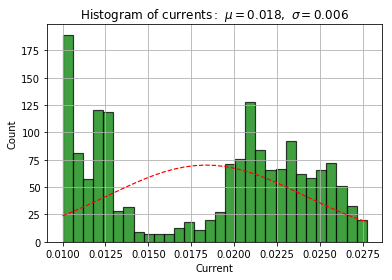

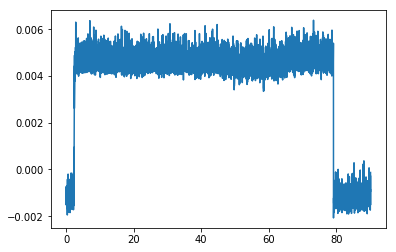

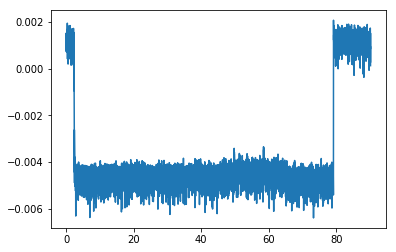

length of updated time list 0
length of updated curr list 0


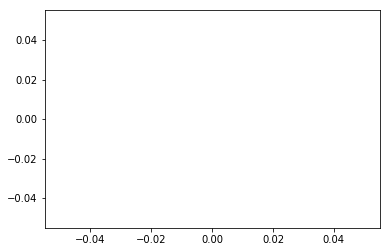

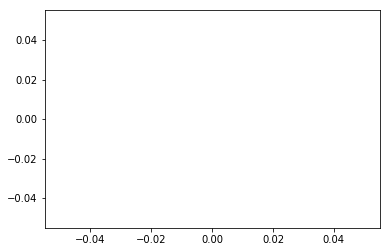

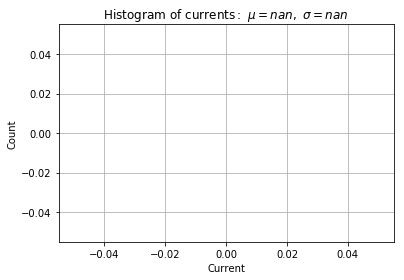

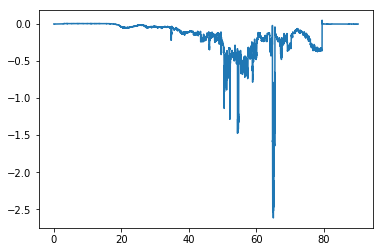

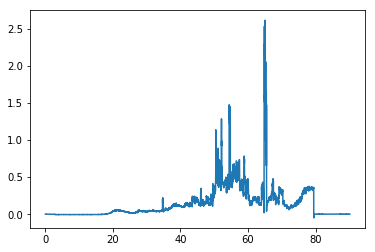

length of updated time list 3035141
length of updated curr list 3035141


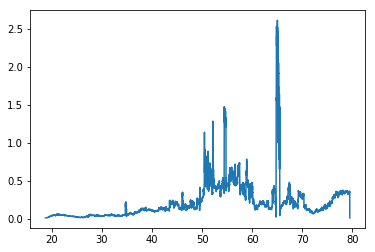

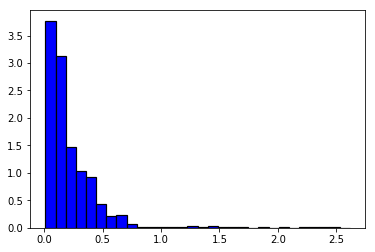

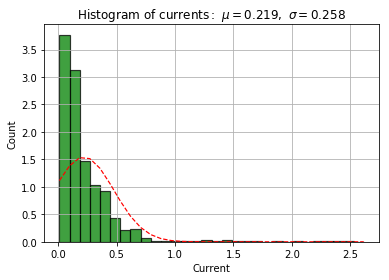

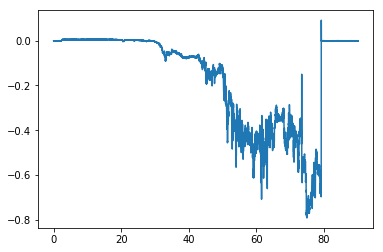

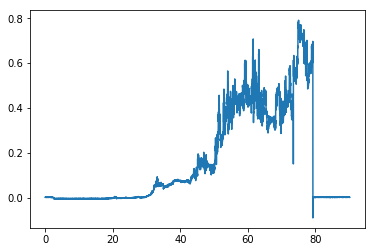

length of updated time list 2425240
length of updated curr list 2425240


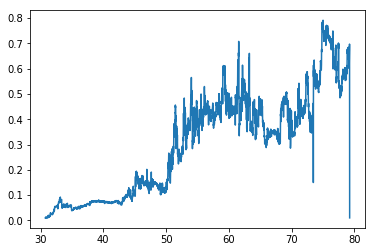

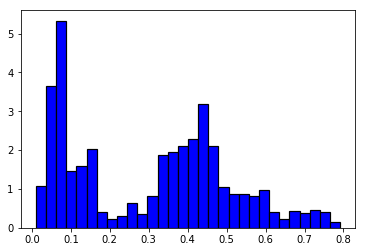

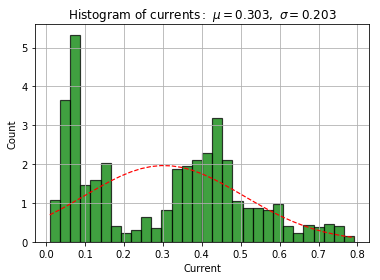

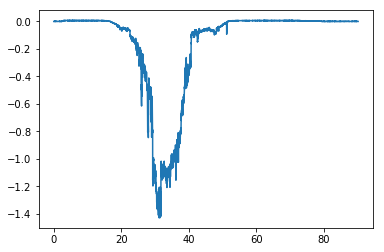

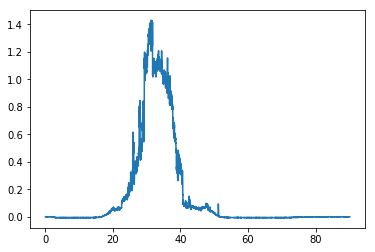

length of updated time list 1695230
length of updated curr list 1695230


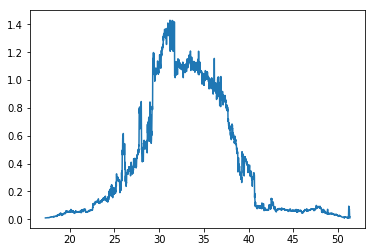

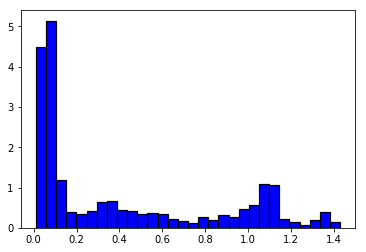

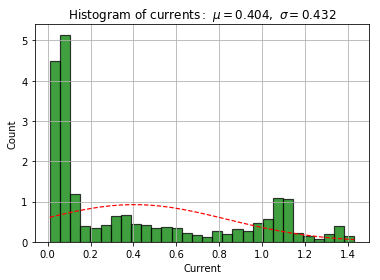

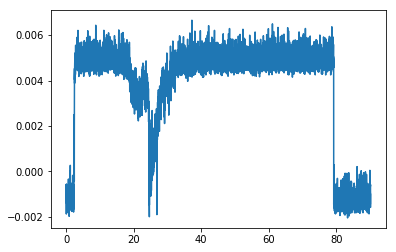

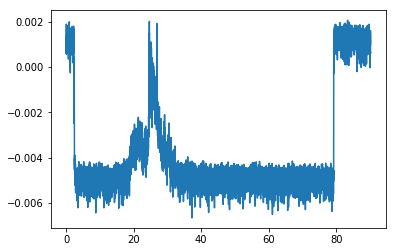

length of updated time list 0
length of updated curr list 0


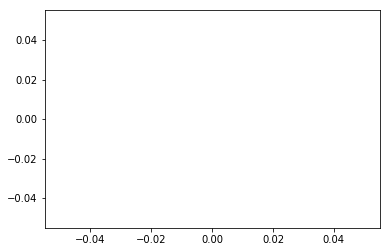

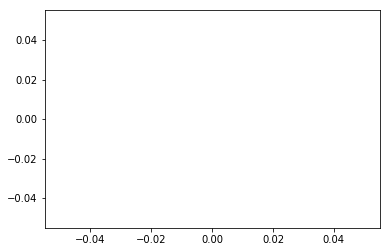

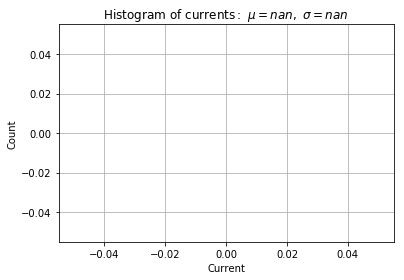

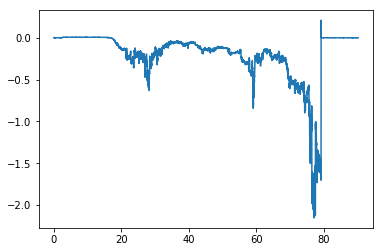

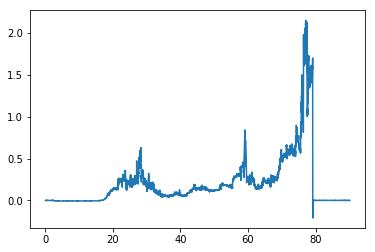

length of updated time list 3088098
length of updated curr list 3088098


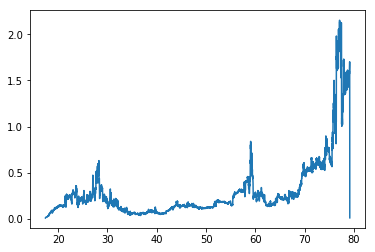

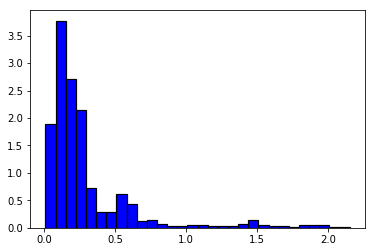

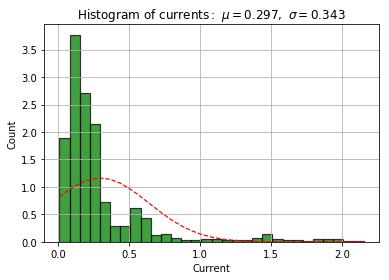

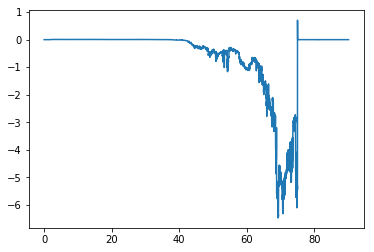

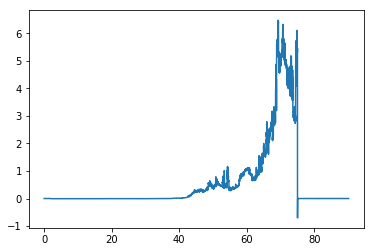

length of updated time list 1813421
length of updated curr list 1813421


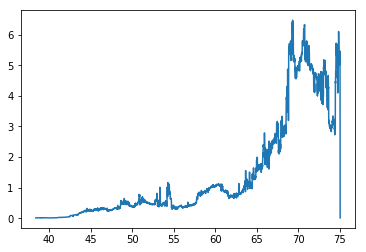

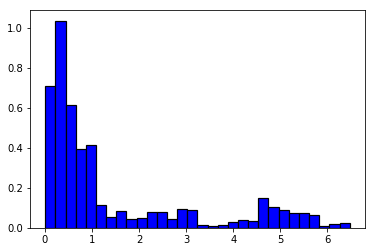

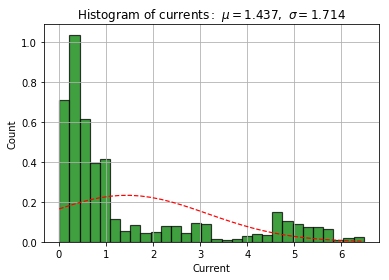

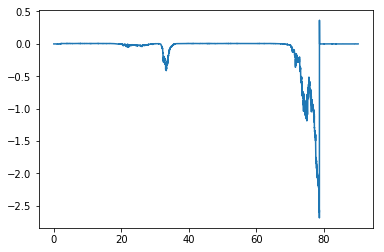

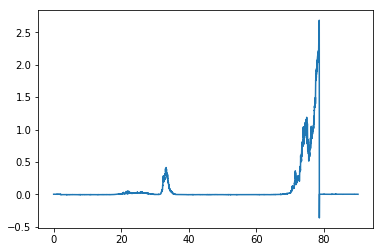

length of updated time list 1031172
length of updated curr list 1031172


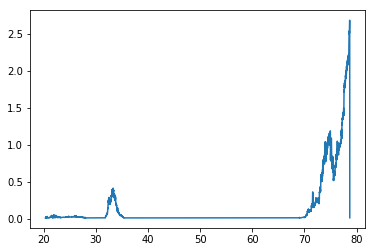

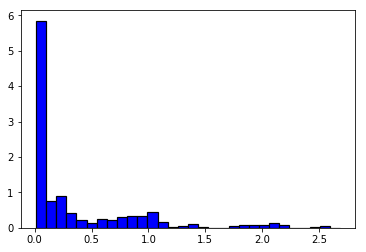

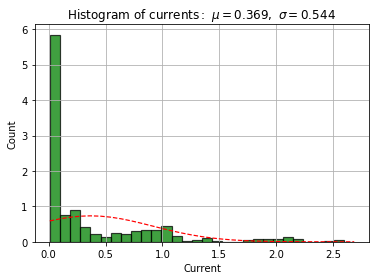

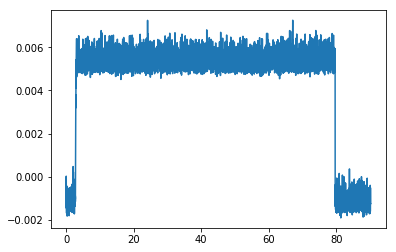

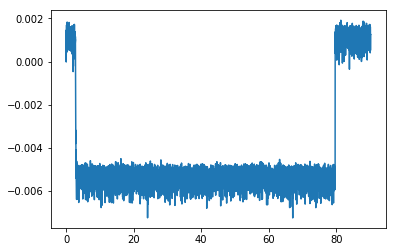

length of updated time list 0
length of updated curr list 0


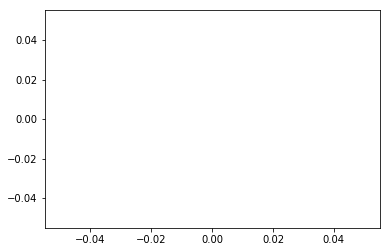

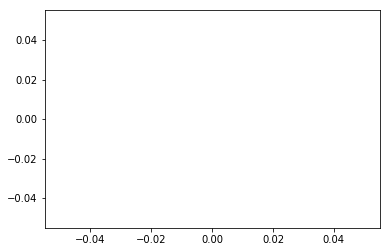

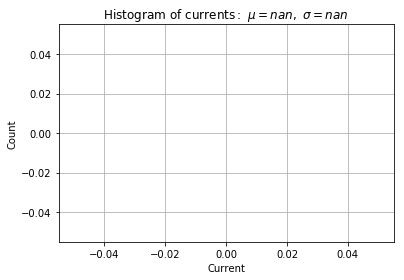

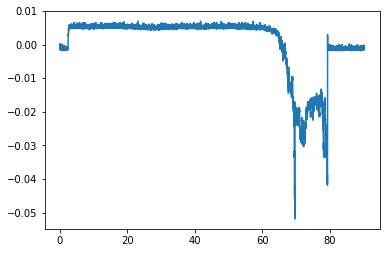

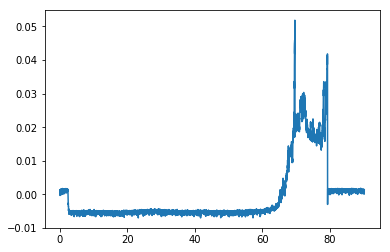

length of updated time list 574928
length of updated curr list 574928


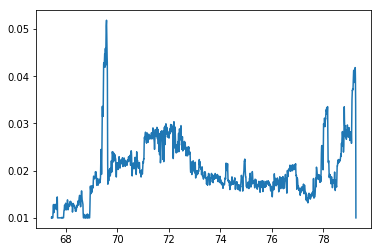

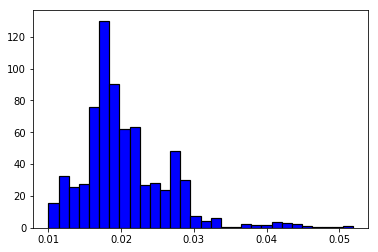

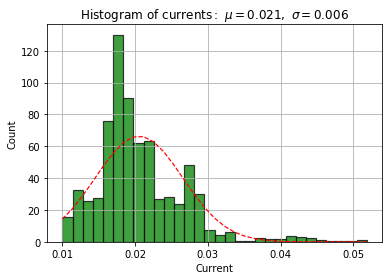

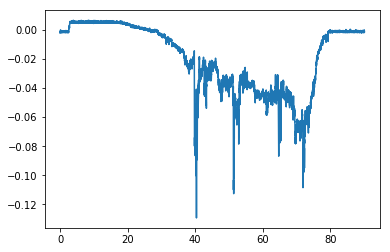

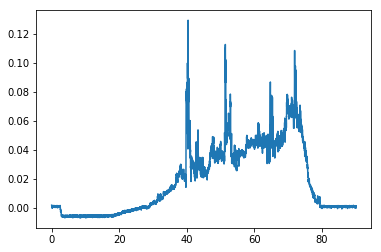

length of updated time list 2195334
length of updated curr list 2195334


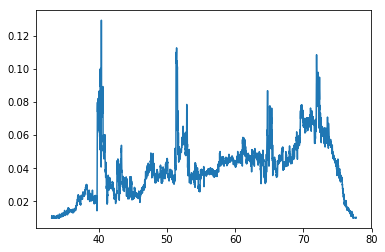

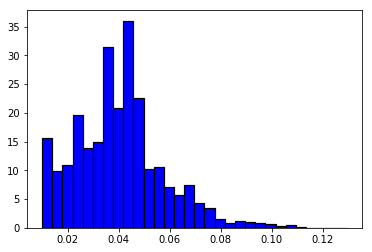

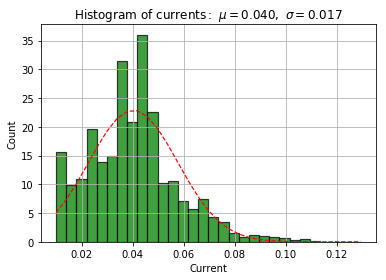

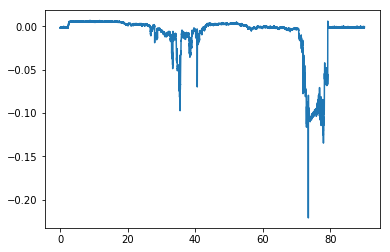

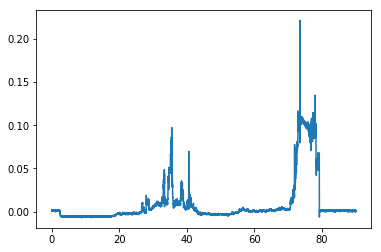

length of updated time list 749323
length of updated curr list 749323


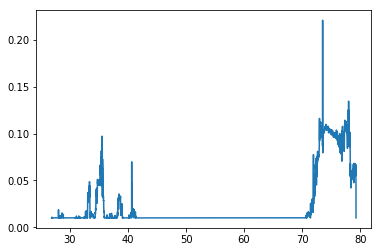

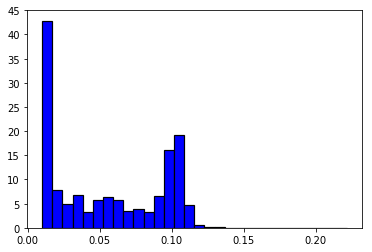

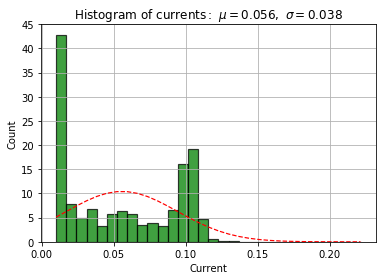

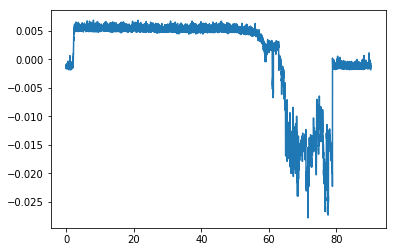

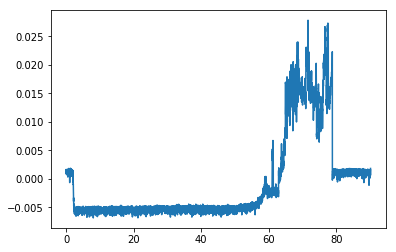

length of updated time list 658582
length of updated curr list 658582


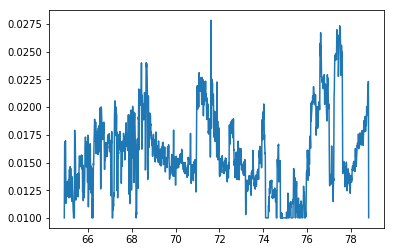

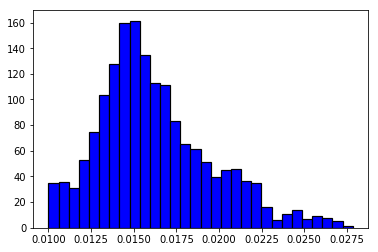

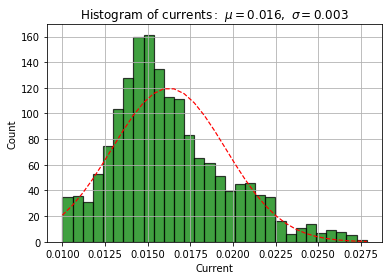

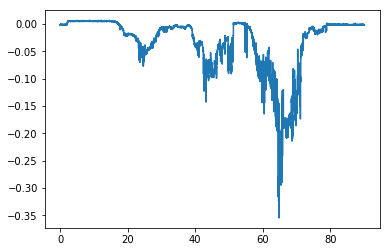

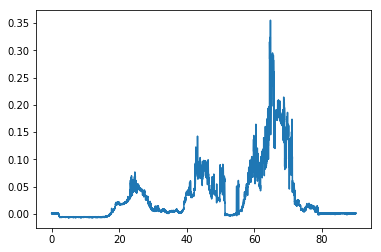

length of updated time list 2215867
length of updated curr list 2215867


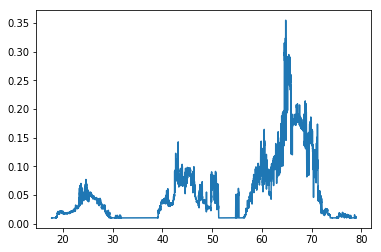

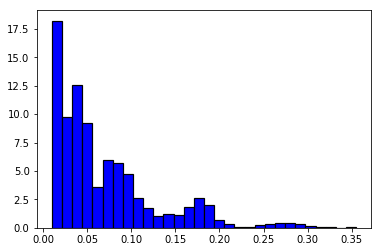

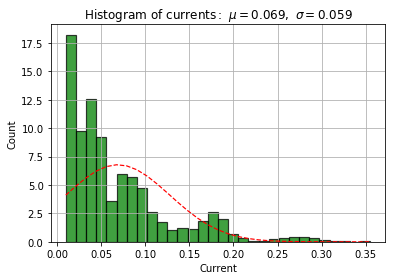

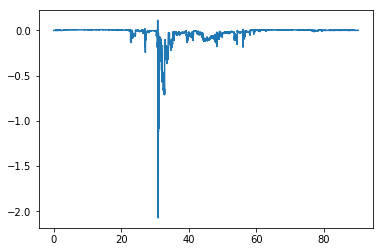

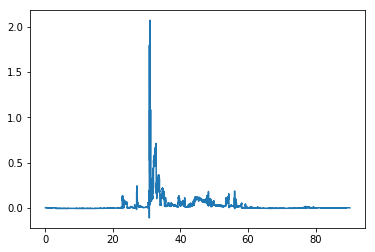

length of updated time list 1544135
length of updated curr list 1544135


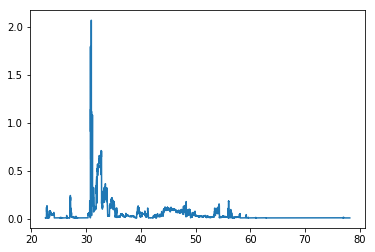

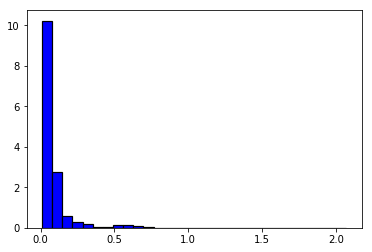

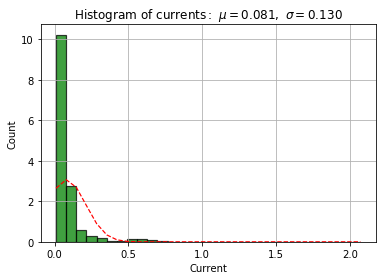

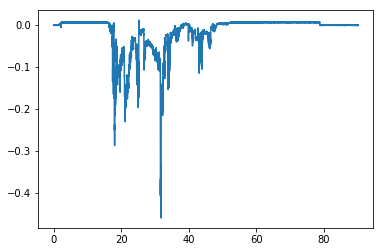

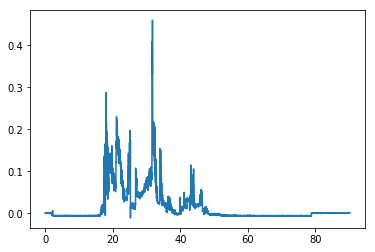

length of updated time list 1335002
length of updated curr list 1335002


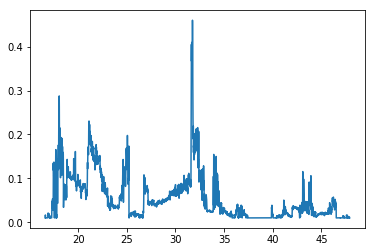

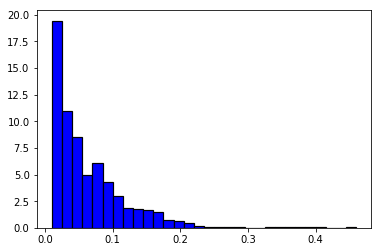

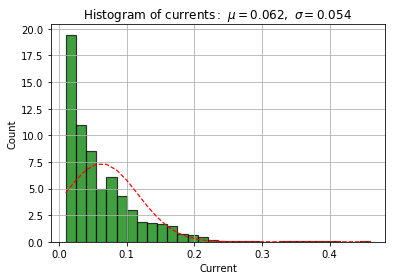

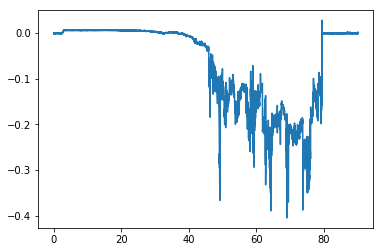

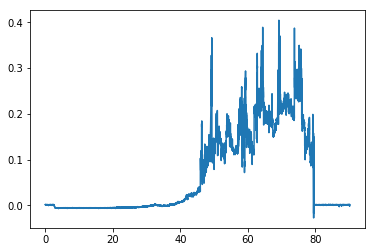

length of updated time list 1920783
length of updated curr list 1920783


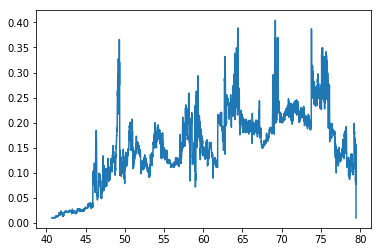

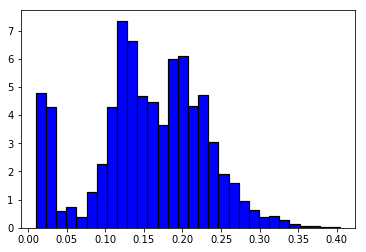

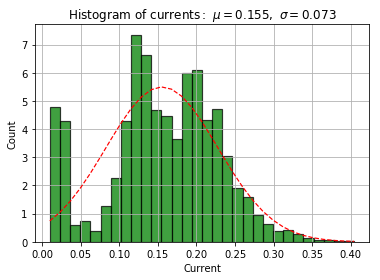

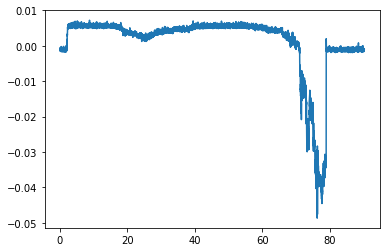

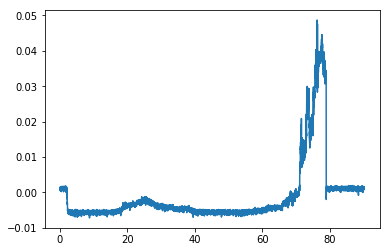

length of updated time list 373508
length of updated curr list 373508


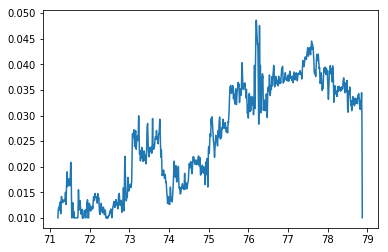

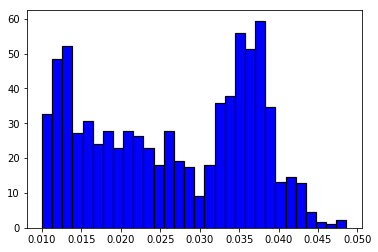

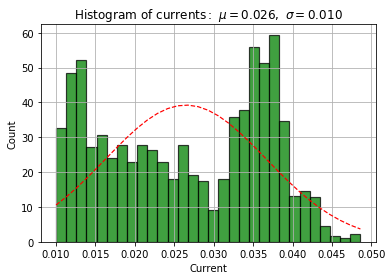

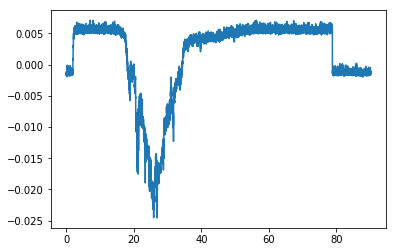

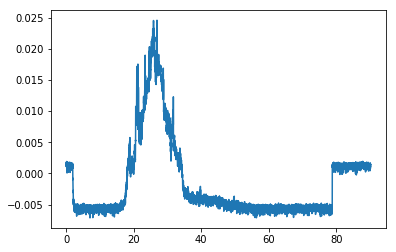

length of updated time list 345206
length of updated curr list 345206


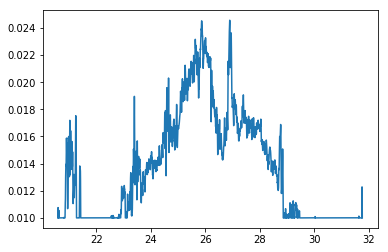

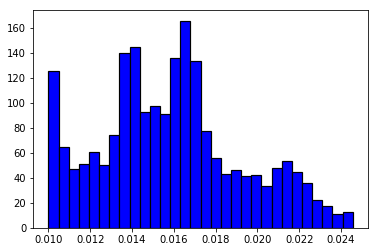

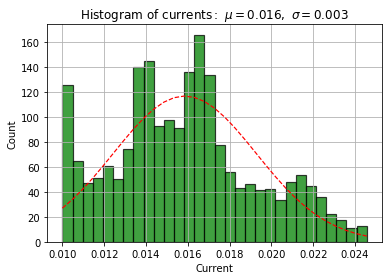

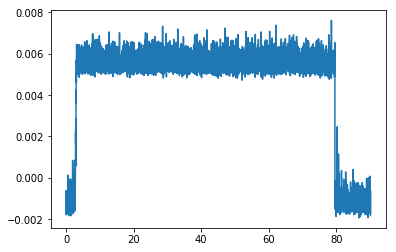

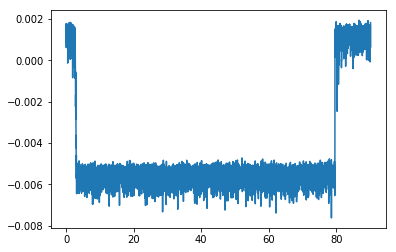

length of updated time list 0
length of updated curr list 0


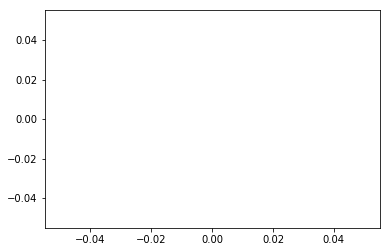

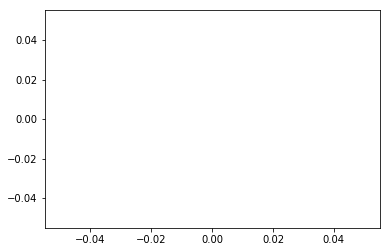

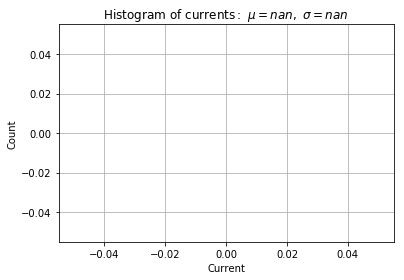

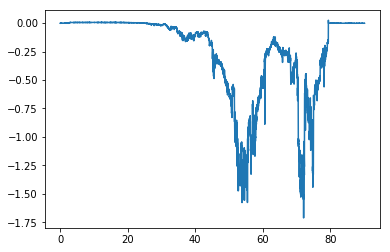

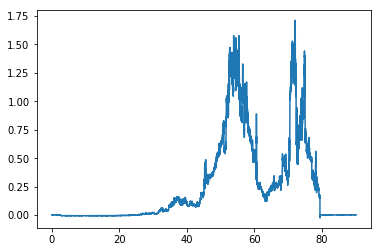

length of updated time list 2569905
length of updated curr list 2569905


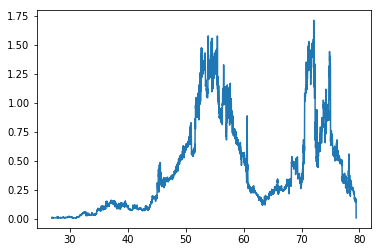

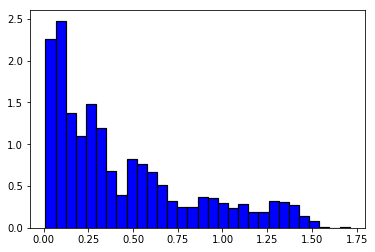

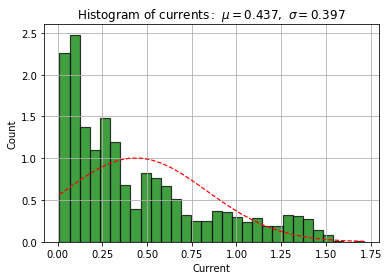

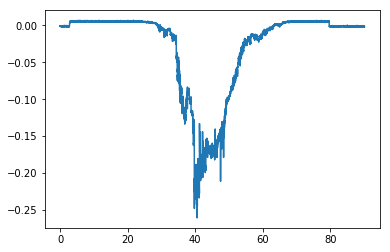

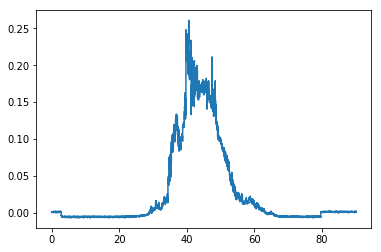

length of updated time list 1415223
length of updated curr list 1415223


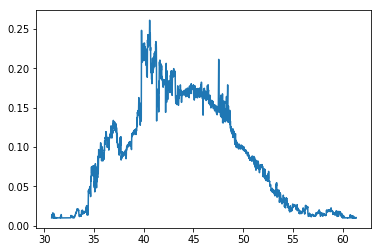

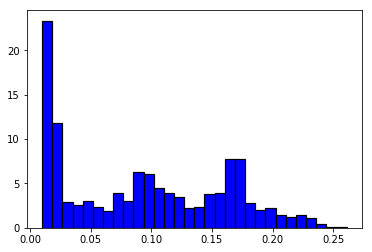

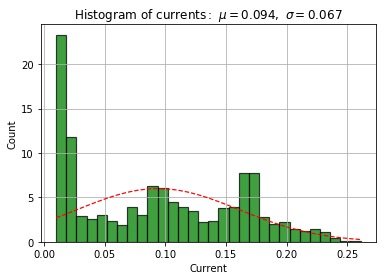

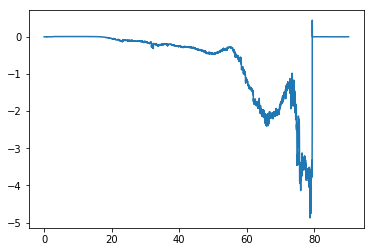

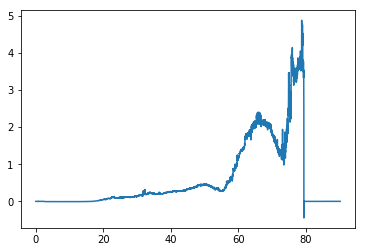

length of updated time list 3086754
length of updated curr list 3086754


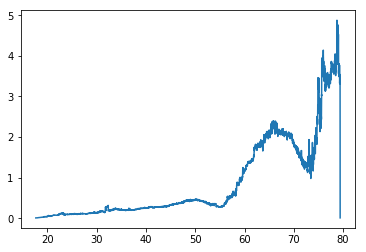

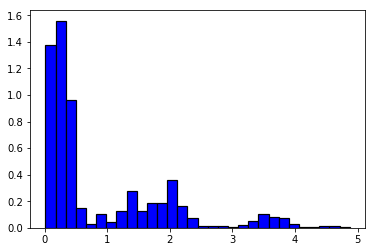

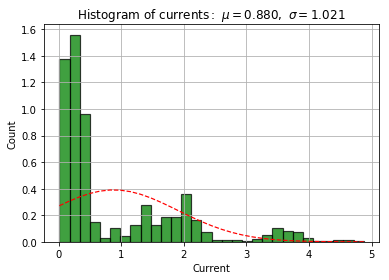

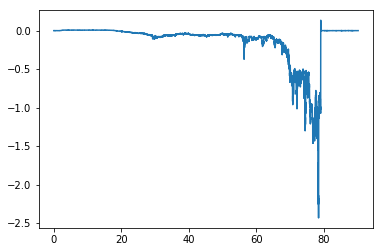

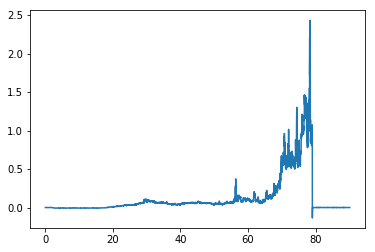

length of updated time list 2955775
length of updated curr list 2955775


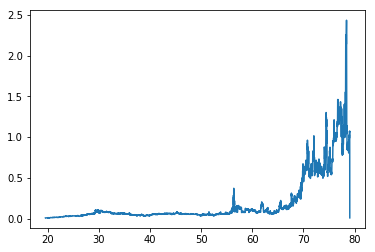

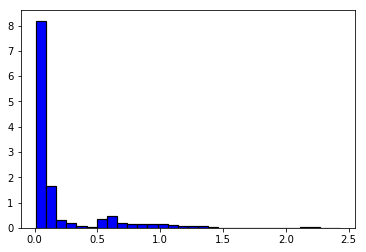

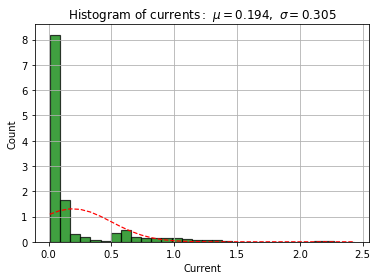

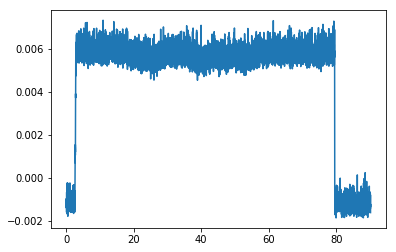

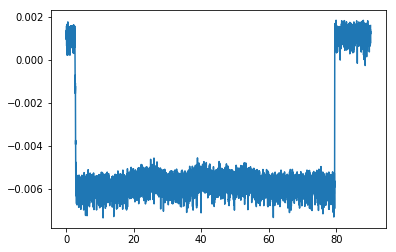

length of updated time list 0
length of updated curr list 0


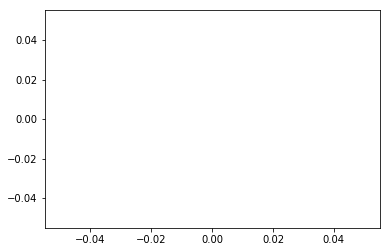

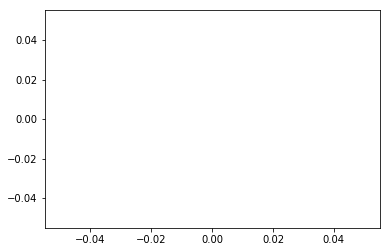

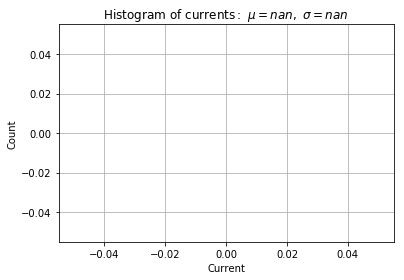

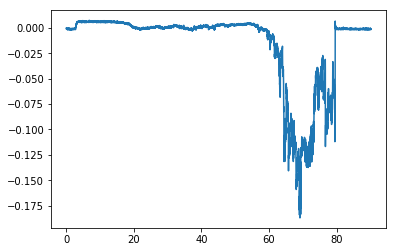

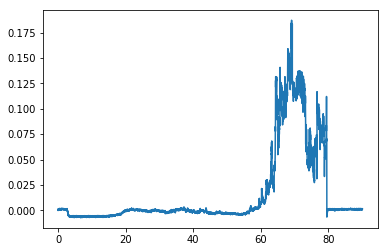

length of updated time list 937432
length of updated curr list 937432


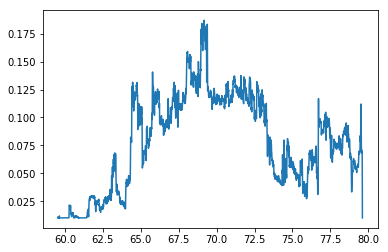

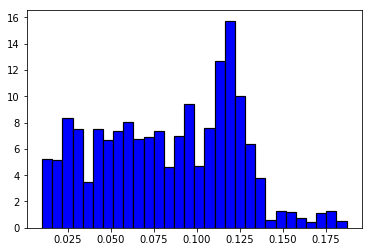

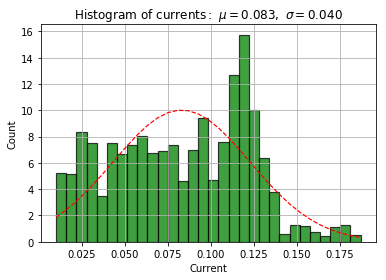

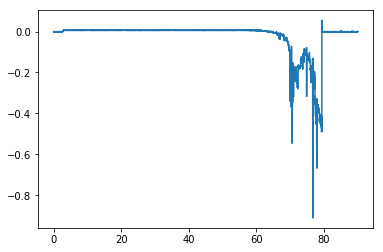

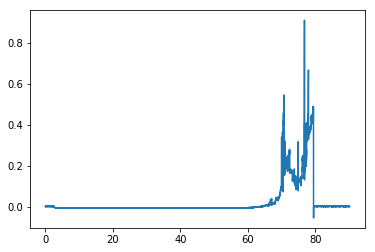

length of updated time list 656233
length of updated curr list 656233


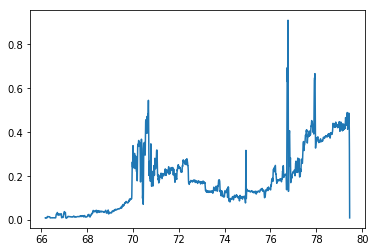

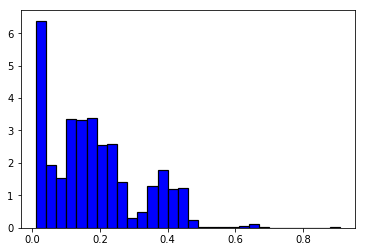

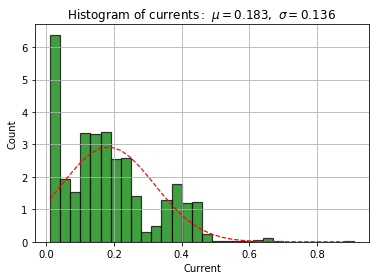

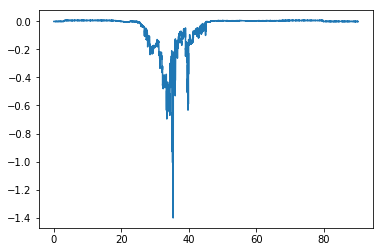

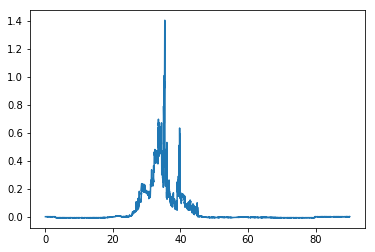

length of updated time list 979146
length of updated curr list 979146


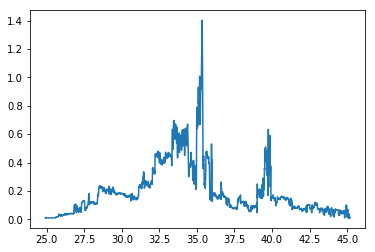

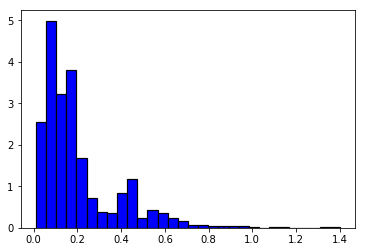

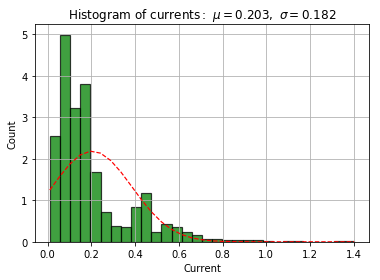

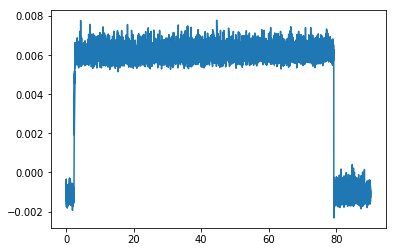

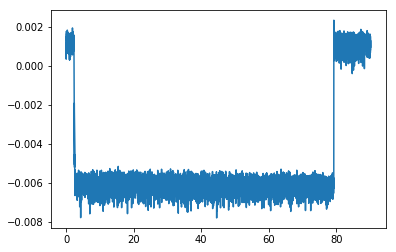

length of updated time list 0
length of updated curr list 0


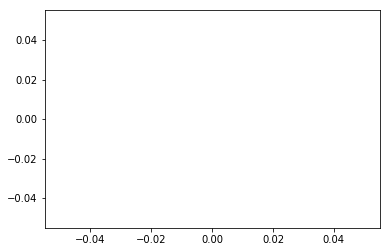

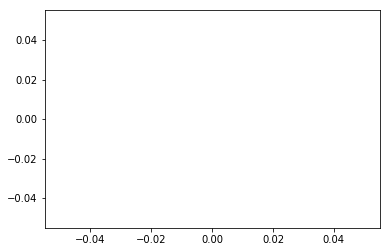

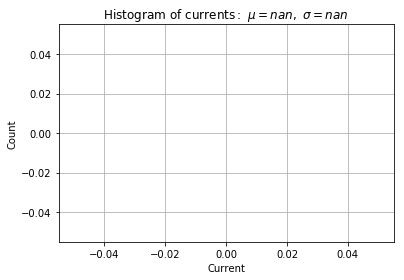

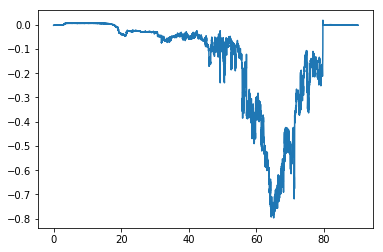

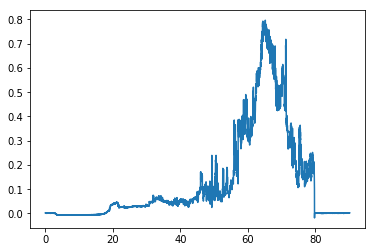

length of updated time list 3049963
length of updated curr list 3049963


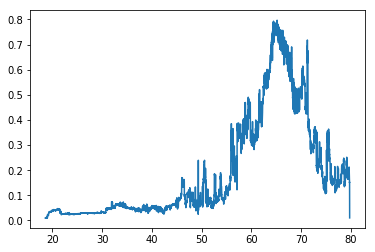

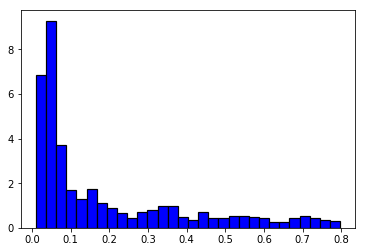

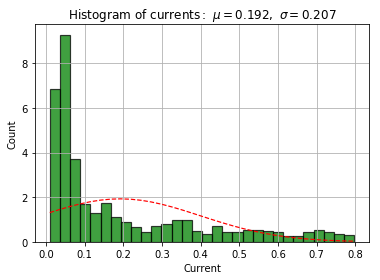

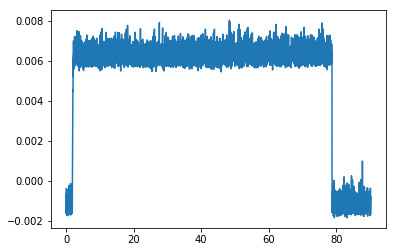

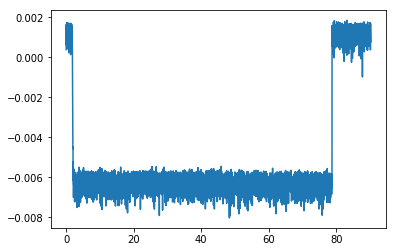

length of updated time list 0
length of updated curr list 0


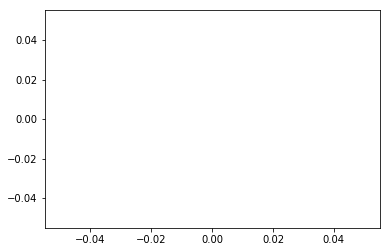

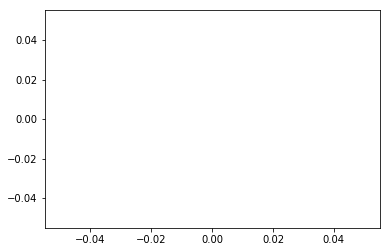

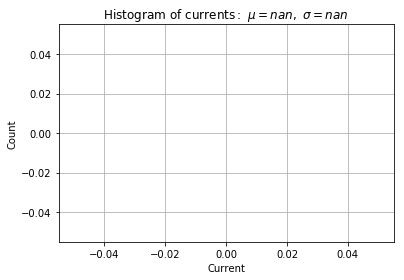

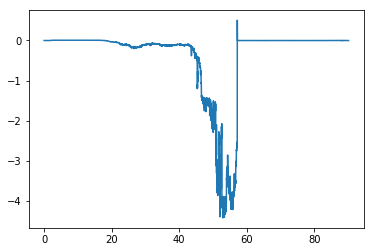

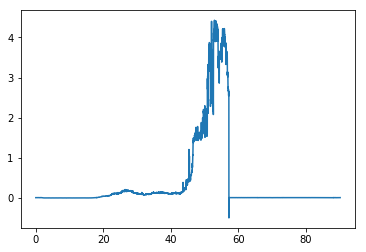

length of updated time list 1927014
length of updated curr list 1927014


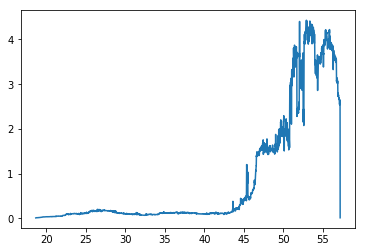

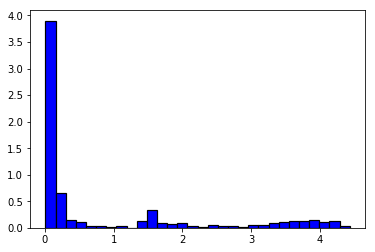

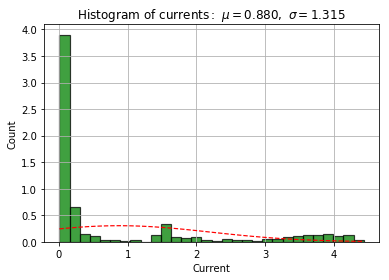

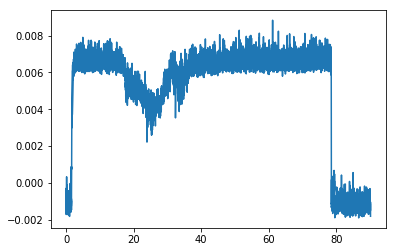

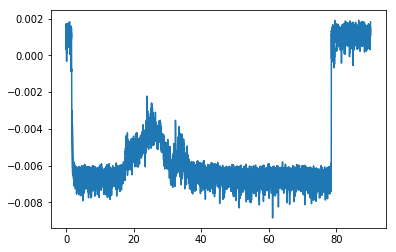

length of updated time list 0
length of updated curr list 0


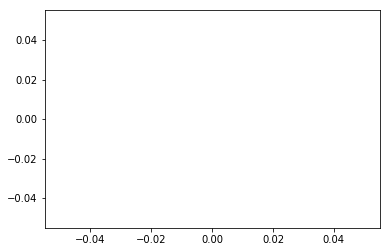

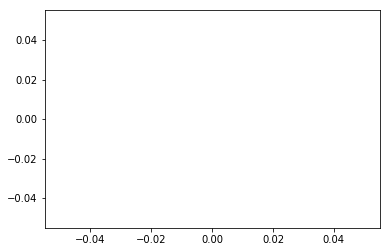

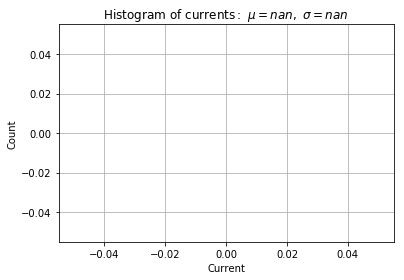

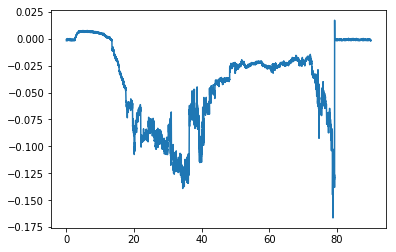

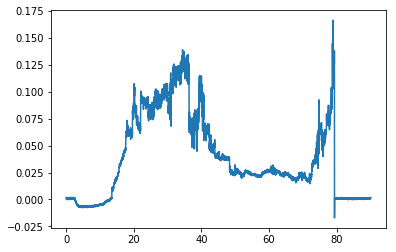

length of updated time list 3284288
length of updated curr list 3284288


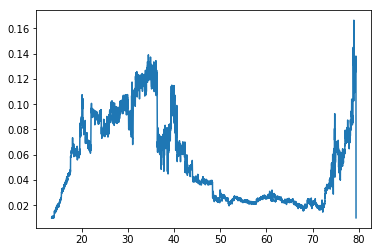

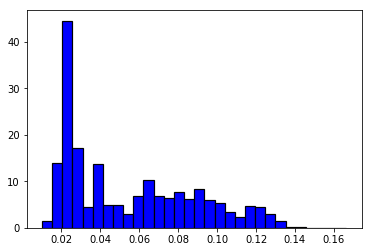

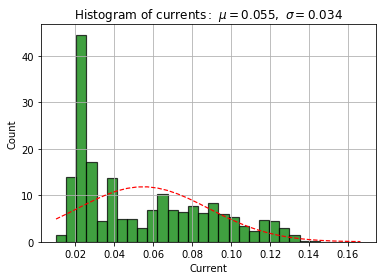

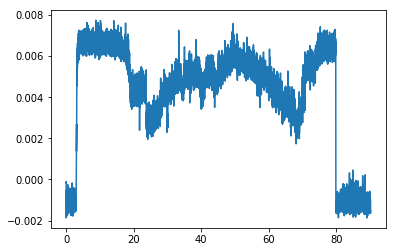

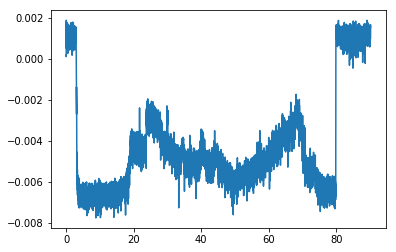

length of updated time list 0
length of updated curr list 0


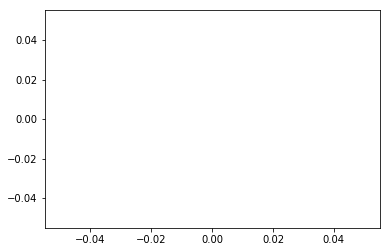

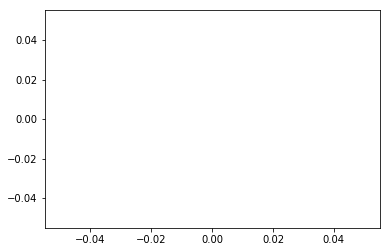

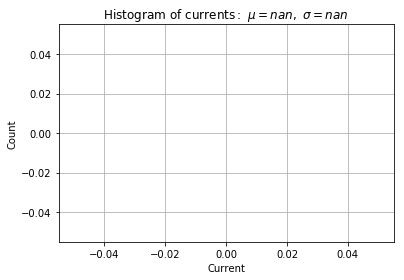

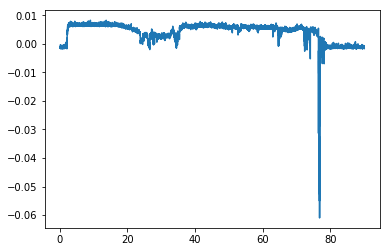

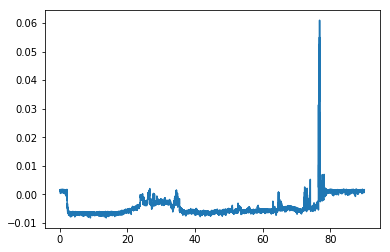

length of updated time list 17321
length of updated curr list 17321


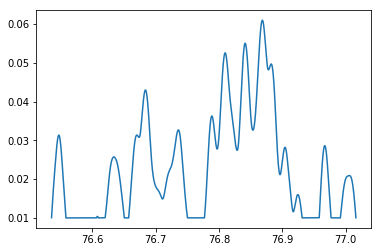

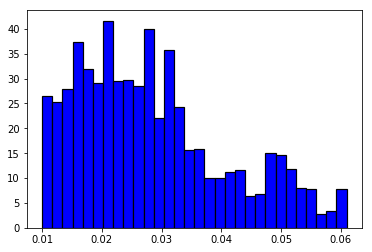

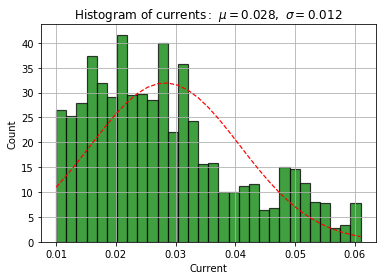

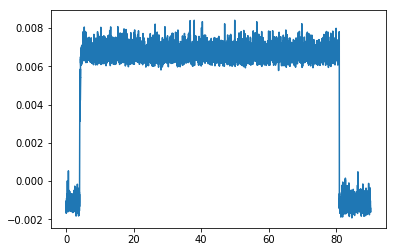

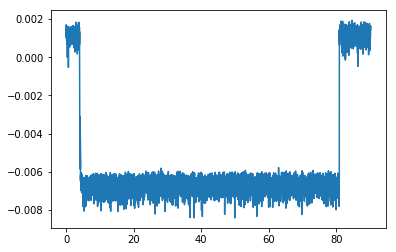

length of updated time list 0
length of updated curr list 0


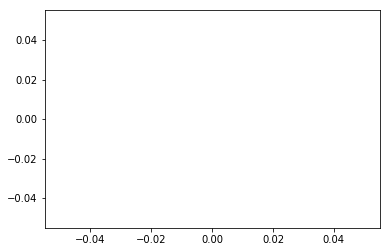

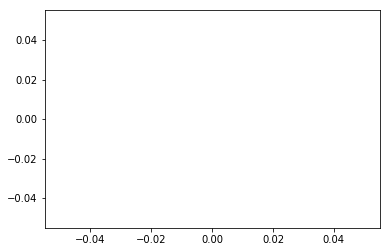

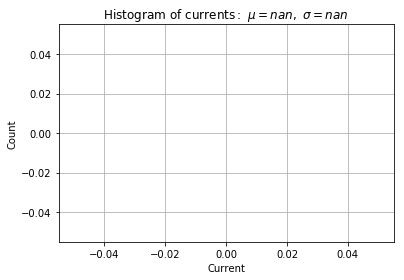

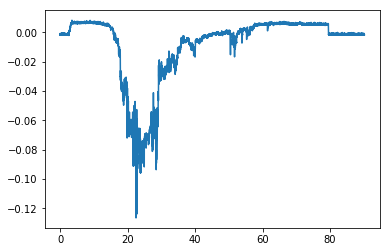

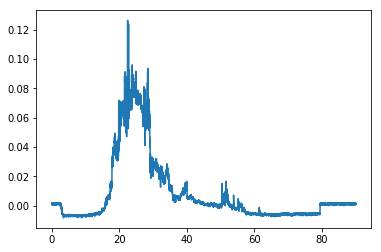

length of updated time list 975198
length of updated curr list 975198


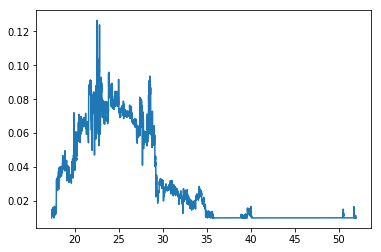

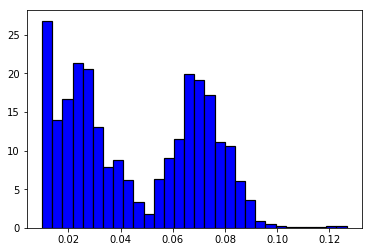

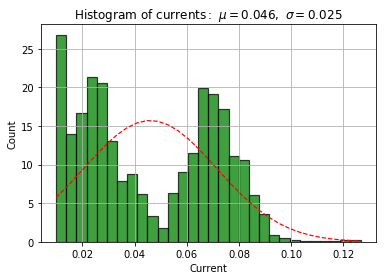

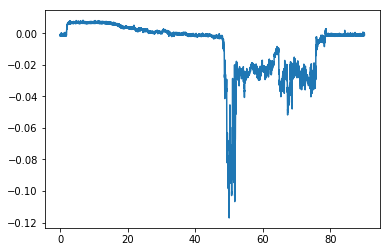

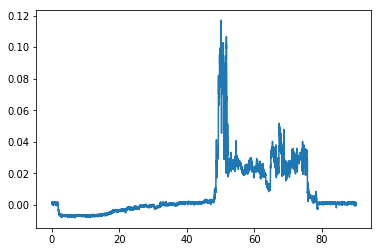

length of updated time list 1355263
length of updated curr list 1355263


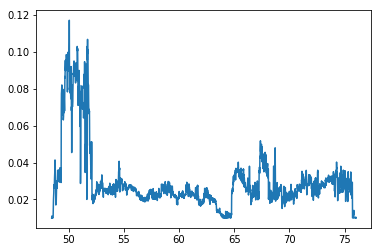

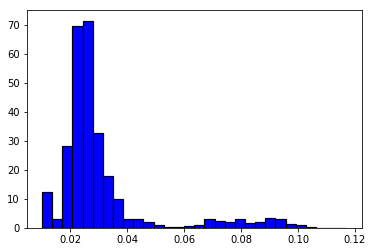

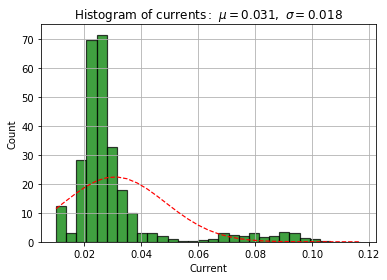

In [10]:

from nptdms import TdmsFile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy import signal
from scipy import io
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy.linalg import solveh_banded
import matplotlib.mlab as mlab
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import warnings




###############################################################################################
###############################################################################################
###############################################################################################
###############################################################################################

num_to_plot= 59
for i in range(1,num_to_plot):
    
    curr_val_dict = io.loadmat('AsLS_treated_signal_(ATC)5_dNTP (%s).mat'%i)

    time_curr_val = curr_val_dict['array']



    time_val = time_curr_val[:,0]
    curr_val = time_curr_val[:,1]

    #Plot the actual data point
    plt.plot(time_val,curr_val)
    plt.savefig('AsLS_treated_signal_(ATC)5_dNTP (%s).png'%i)
    plt.show() 
    plt.close()
    ###############################################################################################
    ###############################################################################################
    ###############################################################################################
    ###############################################################################################

    #Inverting current arrays

    inv_curr_val = curr_val * -1.0

    #plot the inverted data points
    plt.plot(time_val,inv_curr_val)
    plt.savefig('AsLS_treated_signal_inverted_(ATC)5_dNTP (%s).png'%i)
    plt.show() 
    plt.close()

    ###############################################################################################
    ###############################################################################################
    ###############################################################################################
    ###############################################################################################

    #Empty list to store time and curr values > 10pA 

    updated_time_val = []
    updated_curr_val = []

    for j in range(inv_curr_val.shape[0]):
        if inv_curr_val[j] > 0.01:
            updated_curr_val.append(inv_curr_val[j])
            updated_time_val.append(time_val[j])

    np.seterr(divide='ignore', invalid='ignore')

    print("length of updated time list", len(updated_time_val))
    print("length of updated curr list", len(updated_curr_val))


    updated_time_val = np.asarray(updated_time_val)
    updated_curr_val = np.asarray(updated_curr_val)


    plt.plot(updated_time_val,updated_curr_val)
    plt.savefig('AsLS_treated_signal_after_masking_(ATC)5_dNTP (%s).png'%i)
    plt.show() 
    plt.close()
    ###############################################################################################
    ###############################################################################################
    ###############################################################################################
    ###############################################################################################
    
    #histogram
    plt.hist(updated_curr_val, bins= 30, edgecolor='black',  linewidth=1.2, facecolor='blue', density = True)
    plt.savefig('BL_histogram_(ATC)5_dNTP (%s).png'%i)
    plt.show() 
    plt.close()
    
    (mu, sigma) = norm.fit(updated_curr_val)

    # the histogram of the data
    n, bins, patches = plt.hist(updated_curr_val, bins= 30, density=True, edgecolor='black', linewidth=1.2, facecolor='green', alpha=0.75)

    # add a 'best fit' line
    y = norm.pdf( bins, mu, sigma)
    l = plt.plot(bins, y, 'r--', linewidth=1.2)
    #plot
    plt.xlabel('Current')
    plt.ylabel('Count')
    plt.title(r'$\mathrm{Histogram\ of\ currents:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
    plt.grid(True)
    plt.savefig('BL_gaussian(ATC)5_dNTP (%s).png'%i)
    plt.show() 
    plt.close()